In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce

from pandas.plotting import scatter_matrix
import seaborn as sns

%matplotlib inline

### 
1. Get the time series for the following cryptocurrencies from cryptowat.ch starting from 2021-11-22, hourly data
ETH
SOL
AVAX
USDT
FLOW

In [2]:
def get_data(token):
    res = requests.get(
        f'https://api.cryptowat.ch/markets/coinbase-pro/{token}usd/ohlc',
        params={
            'periods': '3600',
            'after': str(int(pd.Timestamp('2021-11-22').timestamp()))
        }
    )

    df = pd.DataFrame(
        res.json()['result']['3600'],
        columns=['ts', 'open', 'high', 'low', 'close', 'volume', 'volumeUSD']
    )
    df['ts'] = pd.to_datetime(df.ts, unit='s')
    df['token'] = token
    
    return df

In [3]:
tokens = ['ETH', 'SOL', 'AVAX', 'USDT']

In [4]:
dfs = [
    (lambda x: x.assign(chain=np.where(x.token.isin(['ETH', 'AAVE', 'COMP']), np.full(x.shape[0], 'ETH'), x.token)))(get_data(token)) 
    for token in tokens
]

df = pd.concat(get_data(token) for token in tokens)
df['chain'] = np.where(df.token.isin(['ETH', 'AAVE', 'COMP']), np.full(df.shape[0], 'ETH'), df.token)
df.set_index('ts', inplace=True)

In [5]:
df

,open,high,low,close,volume,volumeUSD,token,chain
ts,,,,,,,,
2021-11-22 00:00:00,4317.9800,4342.2400,4246.0700,4262.9900,7.262563e+03,3.123077e+07,ETH,ETH
2021-11-22 01:00:00,4263.0400,4270.3400,4212.4500,4234.3700,8.437946e+03,3.574586e+07,ETH,ETH
2021-11-22 02:00:00,4234.8700,4246.7200,4171.1700,4217.8900,9.259725e+03,3.895639e+07,ETH,ETH
2021-11-22 03:00:00,4217.8800,4223.4800,4163.5800,4193.4700,9.259900e+03,3.882032e+07,ETH,ETH
2021-11-22 04:00:00,4192.9500,4213.5900,4147.0000,4168.3500,7.934547e+03,3.315476e+07,ETH,ETH
...,...,...,...,...,...,...,...,...
2021-12-23 04:00:00,1.0002,1.0004,1.0002,1.0002,1.910004e+06,1.910517e+06,USDT,USDT
2021-12-23 05:00:00,1.0002,1.0004,1.0002,1.0004,2.561678e+06,2.562493e+06,USDT,USDT
2021-12-23 06:00:00,1.0004,1.0004,1.0002,1.0004,2.363868e+06,2.364752e+06,USDT,USDT


In [6]:
df.token.unique()

array(['ETH', 'SOL', 'AVAX', 'USDT'], dtype=object)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3012 entries, 2021-11-22 00:00:00 to 2021-12-23 08:00:00
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   open       3012 non-null   float64
 1   high       3012 non-null   float64
 2   low        3012 non-null   float64
 3   close      3012 non-null   float64
 4   volume     3012 non-null   float64
 5   volumeUSD  3012 non-null   float64
 6   token      3012 non-null   object 
 7   chain      3012 non-null   object 
dtypes: float64(6), object(2)
memory usage: 211.8+ KB


In [8]:
df1 = df
df1

,open,high,low,close,volume,volumeUSD,token,chain
ts,,,,,,,,
2021-11-22 00:00:00,4317.9800,4342.2400,4246.0700,4262.9900,7.262563e+03,3.123077e+07,ETH,ETH
2021-11-22 01:00:00,4263.0400,4270.3400,4212.4500,4234.3700,8.437946e+03,3.574586e+07,ETH,ETH
2021-11-22 02:00:00,4234.8700,4246.7200,4171.1700,4217.8900,9.259725e+03,3.895639e+07,ETH,ETH
2021-11-22 03:00:00,4217.8800,4223.4800,4163.5800,4193.4700,9.259900e+03,3.882032e+07,ETH,ETH
2021-11-22 04:00:00,4192.9500,4213.5900,4147.0000,4168.3500,7.934547e+03,3.315476e+07,ETH,ETH
...,...,...,...,...,...,...,...,...
2021-12-23 04:00:00,1.0002,1.0004,1.0002,1.0002,1.910004e+06,1.910517e+06,USDT,USDT
2021-12-23 05:00:00,1.0002,1.0004,1.0002,1.0004,2.561678e+06,2.562493e+06,USDT,USDT
2021-12-23 06:00:00,1.0004,1.0004,1.0002,1.0004,2.363868e+06,2.364752e+06,USDT,USDT


#### Adding FLOW from kraken

In [9]:
def get_data(token):
    res = requests.get(
        f'https://api.cryptowat.ch/markets/kraken/{token}usd/ohlc',
        params={
            'periods': '3600',
            'after': str(int(pd.Timestamp('2021-11-22').timestamp()))
        }
    )

    df = pd.DataFrame(
        res.json()['result']['3600'],
        columns=['ts', 'open', 'high', 'low', 'close', 'volume', 'volumeUSD']
    )
    df['ts'] = pd.to_datetime(df.ts, unit='s')
    df['token'] = token
    
    return df

In [10]:
tokens = ['FLOW']

In [11]:
dfs = [
    (lambda x: x.assign(chain=np.where(x.token.isin(['ETH', 'AAVE', 'COMP']), np.full(x.shape[0], 'ETH'), x.token)))(get_data(token)) 
    for token in tokens
]

df = pd.concat(get_data(token) for token in tokens)
df['chain'] = np.where(df.token.isin(['ETH', 'AAVE', 'COMP']), np.full(df.shape[0], 'ETH'), df.token)
df.set_index('ts', inplace=True)

In [12]:
df2 = df

In [13]:
df = df1.append(df2)

In [14]:
df.token.unique()

array(['ETH', 'SOL', 'AVAX', 'USDT', 'FLOW'], dtype=object)

In [15]:
df

,open,high,low,close,volume,volumeUSD,token,chain
ts,,,,,,,,
2021-11-22 00:00:00,4317.980,4342.240,4246.070,4262.990,7262.562789,3.123077e+07,ETH,ETH
2021-11-22 01:00:00,4263.040,4270.340,4212.450,4234.370,8437.946084,3.574586e+07,ETH,ETH
2021-11-22 02:00:00,4234.870,4246.720,4171.170,4217.890,9259.725370,3.895639e+07,ETH,ETH
2021-11-22 03:00:00,4217.880,4223.480,4163.580,4193.470,9259.899519,3.882032e+07,ETH,ETH
2021-11-22 04:00:00,4192.950,4213.590,4147.000,4168.350,7934.546906,3.315476e+07,ETH,ETH
...,...,...,...,...,...,...,...,...
2021-12-23 04:00:00,8.741,8.749,8.693,8.741,4147.529975,3.615037e+04,FLOW,FLOW
2021-12-23 05:00:00,8.743,8.762,8.724,8.738,10187.858482,8.910109e+04,FLOW,FLOW
2021-12-23 06:00:00,8.754,8.754,8.741,8.741,1901.119825,1.662739e+04,FLOW,FLOW


### 
Get the total USD volume traded for each token in a dataframe, sorted from highest volume to lowest volume

In [16]:


df_usdvol = df.groupby(['token']).agg({'volumeUSD': ['sum']})
df_usdvol.columns = ["_".join(x) for x in df_usdvol.columns.ravel()]
df_usdvol = df_usdvol.reset_index()

df_usdvol.sort_values(by = ['volumeUSD_sum'],ascending = False)

df_usdvol

C:\Users\SANDEE~1\AppData\Local\Temp/ipykernel_22336/305747424.py:2: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  df_usdvol.columns = ["_".join(x) for x in df_usdvol.columns.ravel()]


,token,volumeUSD_sum
0,AVAX,5.040420e+09
1,ETH,2.692837e+10
2,FLOW,1.024140e+08
3,SOL,8.934791e+09
4,USDT,2.473793e+09


In [17]:
df_usdvol.sort_values(by = ['volumeUSD_sum'],ascending = False)

,token,volumeUSD_sum
1,ETH,2.692837e+10
3,SOL,8.934791e+09
0,AVAX,5.040420e+09
4,USDT,2.473793e+09
2,FLOW,1.024140e+08


In [18]:
df

,open,high,low,close,volume,volumeUSD,token,chain
ts,,,,,,,,
2021-11-22 00:00:00,4317.980,4342.240,4246.070,4262.990,7262.562789,3.123077e+07,ETH,ETH
2021-11-22 01:00:00,4263.040,4270.340,4212.450,4234.370,8437.946084,3.574586e+07,ETH,ETH
2021-11-22 02:00:00,4234.870,4246.720,4171.170,4217.890,9259.725370,3.895639e+07,ETH,ETH
2021-11-22 03:00:00,4217.880,4223.480,4163.580,4193.470,9259.899519,3.882032e+07,ETH,ETH
2021-11-22 04:00:00,4192.950,4213.590,4147.000,4168.350,7934.546906,3.315476e+07,ETH,ETH
...,...,...,...,...,...,...,...,...
2021-12-23 04:00:00,8.741,8.749,8.693,8.741,4147.529975,3.615037e+04,FLOW,FLOW
2021-12-23 05:00:00,8.743,8.762,8.724,8.738,10187.858482,8.910109e+04,FLOW,FLOW
2021-12-23 06:00:00,8.754,8.754,8.741,8.741,1901.119825,1.662739e+04,FLOW,FLOW


### 
Add a column that calculates the close price ratio between ETH and SOL for each house (i.e. close price of ETH / close price of SOL for each period)

In [19]:
df_ethsol = df[["close", "token"]] 
df_ethsol

,close,token
ts,,
2021-11-22 00:00:00,4262.990,ETH
2021-11-22 01:00:00,4234.370,ETH
2021-11-22 02:00:00,4217.890,ETH
2021-11-22 03:00:00,4193.470,ETH
2021-11-22 04:00:00,4168.350,ETH
...,...,...
2021-12-23 04:00:00,8.741,FLOW
2021-12-23 05:00:00,8.738,FLOW
2021-12-23 06:00:00,8.741,FLOW


In [20]:
df_ethsol = df_ethsol.pivot_table(index ='ts', columns ='token', values =['close'])
df_ethsol.columns = ['_'.join(col).strip() for col in df_ethsol.columns.values]
df_ethsol.reset_index(inplace = True)
df_ethsol

,ts,close_AVAX,close_ETH,close_FLOW,close_SOL,close_USDT
0,2021-11-22 00:00:00,128.67,4262.99,14.150,230.785,1.0012
1,2021-11-22 01:00:00,134.85,4234.37,13.621,226.000,1.0013
2,2021-11-22 02:00:00,132.54,4217.89,13.753,227.037,1.0012
3,2021-11-22 03:00:00,133.38,4193.47,13.652,223.117,1.0011
4,2021-11-22 04:00:00,136.29,4168.35,13.581,220.652,1.0009
...,...,...,...,...,...,...
748,2021-12-23 04:00:00,122.87,3960.84,8.741,180.980,1.0002
749,2021-12-23 05:00:00,120.39,3949.85,8.738,179.510,1.0004
750,2021-12-23 06:00:00,120.10,3947.06,8.741,179.350,1.0004
751,2021-12-23 07:00:00,120.65,3962.72,8.749,180.060,1.0004


In [21]:
# Creating column ETH_SOL - ratio of ETH and SOL
df_ethsol['eth_sol'] = df_ethsol.close_ETH / df_ethsol.close_SOL
df_ethsol

,ts,close_AVAX,close_ETH,close_FLOW,close_SOL,close_USDT,eth_sol
0,2021-11-22 00:00:00,128.67,4262.99,14.150,230.785,1.0012,18.471694
1,2021-11-22 01:00:00,134.85,4234.37,13.621,226.000,1.0013,18.736150
2,2021-11-22 02:00:00,132.54,4217.89,13.753,227.037,1.0012,18.577985
3,2021-11-22 03:00:00,133.38,4193.47,13.652,223.117,1.0011,18.794937
4,2021-11-22 04:00:00,136.29,4168.35,13.581,220.652,1.0009,18.891059
...,...,...,...,...,...,...,...
748,2021-12-23 04:00:00,122.87,3960.84,8.741,180.980,1.0002,21.885512
749,2021-12-23 05:00:00,120.39,3949.85,8.738,179.510,1.0004,22.003510
750,2021-12-23 06:00:00,120.10,3947.06,8.741,179.350,1.0004,22.007583
751,2021-12-23 07:00:00,120.65,3962.72,8.749,180.060,1.0004,22.007775


### 
Change the name of the volume and volumeUSD columns to volumeBase and volumeTerm

In [22]:

df.rename(columns = {'volume':'volumeBase', 'volumeUSD':'volumeTerm'}, inplace = True)
df

,open,high,low,close,volumeBase,volumeTerm,token,chain
ts,,,,,,,,
2021-11-22 00:00:00,4317.980,4342.240,4246.070,4262.990,7262.562789,3.123077e+07,ETH,ETH
2021-11-22 01:00:00,4263.040,4270.340,4212.450,4234.370,8437.946084,3.574586e+07,ETH,ETH
2021-11-22 02:00:00,4234.870,4246.720,4171.170,4217.890,9259.725370,3.895639e+07,ETH,ETH
2021-11-22 03:00:00,4217.880,4223.480,4163.580,4193.470,9259.899519,3.882032e+07,ETH,ETH
2021-11-22 04:00:00,4192.950,4213.590,4147.000,4168.350,7934.546906,3.315476e+07,ETH,ETH
...,...,...,...,...,...,...,...,...
2021-12-23 04:00:00,8.741,8.749,8.693,8.741,4147.529975,3.615037e+04,FLOW,FLOW
2021-12-23 05:00:00,8.743,8.762,8.724,8.738,10187.858482,8.910109e+04,FLOW,FLOW
2021-12-23 06:00:00,8.754,8.754,8.741,8.741,1901.119825,1.662739e+04,FLOW,FLOW


### 
create a fat table indexed by the timestamp, and each column is the close price of each token (i.e. this should be a table of 200 rows and 5 columns)

In [23]:
df_pivot = df.pivot_table(index ='ts', columns ='token', values =['close'])
df_pivot.columns = ['_'.join(col).strip() for col in df_pivot.columns.values]
#df_pivot.reset_index(inplace = True)
df_pivot

,close_AVAX,close_ETH,close_FLOW,close_SOL,close_USDT
ts,,,,,
2021-11-22 00:00:00,128.67,4262.99,14.150,230.785,1.0012
2021-11-22 01:00:00,134.85,4234.37,13.621,226.000,1.0013
2021-11-22 02:00:00,132.54,4217.89,13.753,227.037,1.0012
2021-11-22 03:00:00,133.38,4193.47,13.652,223.117,1.0011
2021-11-22 04:00:00,136.29,4168.35,13.581,220.652,1.0009
...,...,...,...,...,...
2021-12-23 04:00:00,122.87,3960.84,8.741,180.980,1.0002
2021-12-23 05:00:00,120.39,3949.85,8.738,179.510,1.0004
2021-12-23 06:00:00,120.10,3947.06,8.741,179.350,1.0004


In [24]:
df_logreturns = np.log(df_pivot.loc[:,:]).diff(1)
df_logreturns.columns = df_pivot.columns + "_logreturns"
df_logreturns

,close_AVAX_logreturns,close_ETH_logreturns,close_FLOW_logreturns,close_SOL_logreturns,close_USDT_logreturns
ts,,,,,
2021-11-22 00:00:00,NaN,NaN,NaN,NaN,NaN
2021-11-22 01:00:00,0.046912,-0.006736,-0.038102,-0.020952,0.0001
2021-11-22 02:00:00,-0.017279,-0.003900,0.009644,0.004578,-0.0001
2021-11-22 03:00:00,0.006318,-0.005806,-0.007371,-0.017417,-0.0001
2021-11-22 04:00:00,0.021583,-0.006008,-0.005214,-0.011109,-0.0002
...,...,...,...,...,...
2021-12-23 04:00:00,0.004813,-0.001466,-0.005249,0.005485,0.0000
2021-12-23 05:00:00,-0.020390,-0.002779,-0.000343,-0.008156,0.0002
2021-12-23 06:00:00,-0.002412,-0.000707,0.000343,-0.000892,0.0000


### 
calculate the correlation of the tokens using the table above

<AxesSubplot:title={'center':'Correlation Matrix'}>

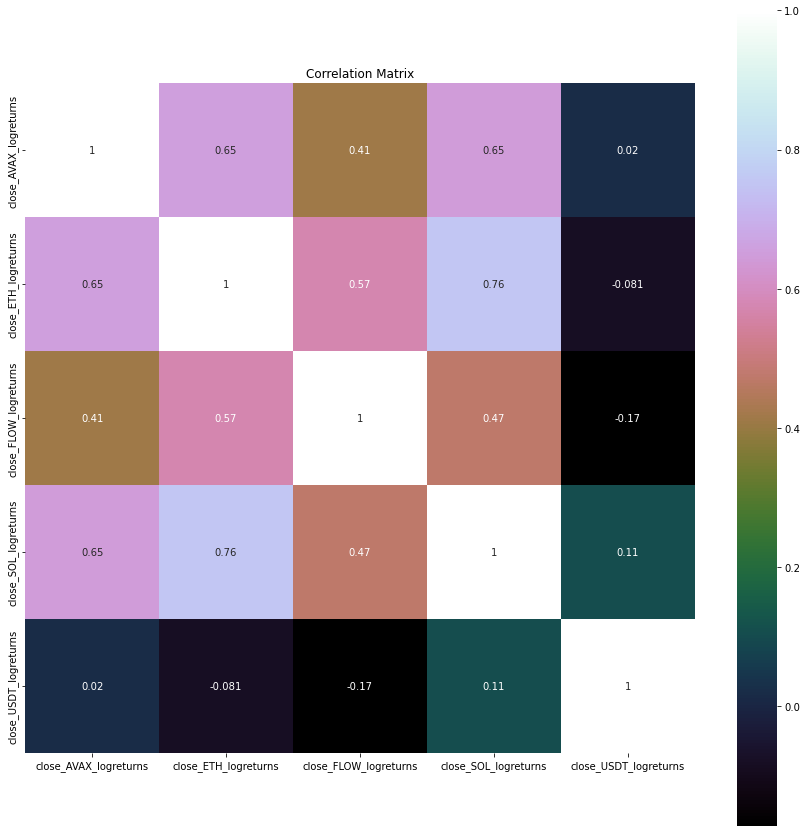

In [25]:

correlation = df_logreturns.corr()
plt.figure(figsize=(15,15))
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')